In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from diskline import *
import scipy.constants as cns
import scipy.integrate as intg
from astropy.io import fits

In [2]:
nu = np.arange( cns.c/9.2e-7, cns.c/6.1e-7, 0.25e12)
lamda = cns.c/nu

halpha = diskline('Halpha')

## Test the code for different values of inclination ($\theta_i$)

In [3]:
local_broadening = 0.002
Rin  = 400.
Rout = 1000.
inclination = 5.
halpha.emissivity_index = 3
halpha.xnum = 80     # number of annuli to be used during integration in the outer disk i.e. r > 50 Rg
halpha.dphi = 0.005  # angular integration


ff1 = halpha.flam( lamda, Halpha, local_broadening, 
                  Rin, Rout, inclination, 1.)

halpha.xnum = 80 
halpha.dphi = 0.005
ff2 = halpha.flam( lamda, Halpha, local_broadening,
                  Rin, Rout, 2*inclination, 1.)

halpha.xnum = 80
halpha.dphi = 0.005
ff3 = halpha.flam( lamda, Halpha, local_broadening,
                  Rin, Rout, 3*inclination, 1.)


(6400.0, 6800.0)

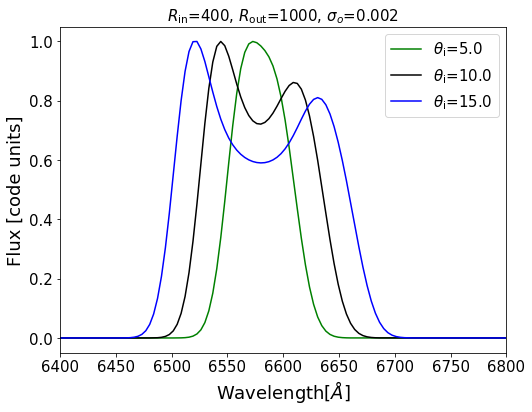

In [4]:
plt.figure(figsize=(8,6))
plt.title(r"$R_{\rm in}$=400, $R_{\rm out}$=1000, $\sigma_o$=0.002", fontsize=15)

plt.plot(lamda/1e-10, ff1/max(ff1) , color = 'g', label=r"$\theta_{\rm i}$="+str(inclination))
plt.plot(lamda/1e-10, ff2/max(ff2) , color = 'k', label=r"$\theta_{\rm i}$="+str(2*inclination))
plt.plot(lamda/1e-10, ff3/max(ff3) , color = 'b', label=r"$\theta_{\rm i}$="+str(3*inclination))

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.legend(loc='best', fontsize=15)

plt.xlabel(r"Wavelength[$\AA$]", fontsize=18)
plt.ylabel(r"Flux [code units]", fontsize=18)

plt.xlim(6400, 6800)

## Test the code for different values of broadening ($\sigma_0$)

In [5]:
local_broadening = 0.004
Rin  = 400.
Rout = 1000.
inclination = 15.

halpha.xnum = 80     # number of annuli to be used during integration in the outer disk i.e. r > 50 Rg
halpha.dphi = 0.005  # angular integration

ff4 = halpha.flam( lamda, Halpha, local_broadening, 
                  Rin, Rout, inclination, 1. )


(6400.0, 6800.0)

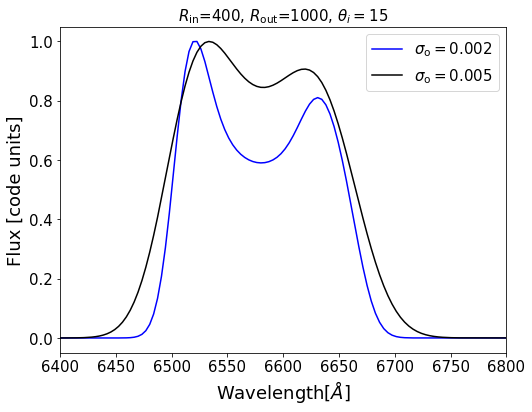

In [6]:
plt.figure(figsize=(8,6))
plt.title(r"$R_{\rm in}$=400, $R_{\rm out}$=1000, $\theta_i = 15$", fontsize=15)

plt.plot( lamda/1e-10 , ff3/max(ff3) , color = 'b', label=r"$\sigma_{\rm o}=0.002$")
plt.plot( lamda/1e-10 , ff4/max(ff4) , color = 'k', label=r"$\sigma_{\rm o}=0.005$")
plt.xlim(6400,6800)

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.legend(loc='best', fontsize=15)

plt.xlabel(r"Wavelength[$\AA$]", fontsize=18)
plt.ylabel(r"Flux [code units]", fontsize=18)

plt.xlim(6400, 6800)

## Test the code for different values of outer radius ($R_{\rm out}$)

In [7]:
local_broadening = 0.002
Rin  = 400.
Rout = 1000.
inclination = 15.

halpha.xnum = 80     # number of annuli to be used during integration in the outer disk i.e. r > 50 Rg
halpha.dphi = 0.005  # angular integration

ff5 = halpha.flam( lamda, Halpha, local_broadening, 
                  Rin, Rout, inclination, 1. )

ff6 = halpha.flam( lamda, Halpha, local_broadening, 
                  Rin, 1.5*Rout, inclination, 1. )

ff7 = halpha.flam( lamda, Halpha, local_broadening, 
                  Rin, 2.0*Rout, inclination, 1. )

Text(0, 0.5, 'Flux [code units]')

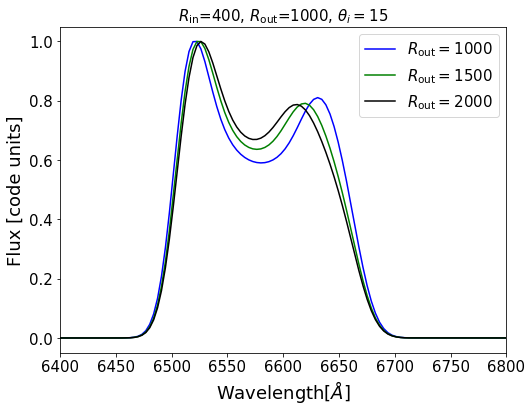

In [8]:
plt.figure(figsize=(8,6))
plt.title(r"$R_{\rm in}$=400, $R_{\rm out}$=1000, $\theta_i = 15$", fontsize=15)

plt.plot( lamda/1e-10 , ff5/max(ff5) , color = 'b', label=r"$R_{\rm out}=1000$")
plt.plot( lamda/1e-10 , ff6/max(ff6) , color = 'g', label=r"$R_{\rm out}=1500$")
plt.plot( lamda/1e-10 , ff7/max(ff7) , color = 'k', label=r"$R_{\rm out}=2000$")
plt.xlim(6400,6800)

plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.legend(loc='best', fontsize=15)

plt.xlabel(r"Wavelength[$\AA$]", fontsize=18)
plt.ylabel(r"Flux [code units]", fontsize=18)

## Test the code for different values of inner radius ($R_{\rm in}$)

In [9]:
local_broadening = 0.002
Rin  = 200.
Rout = 1000.
inclination = 15.

halpha.xnum = 80     # number of annuli to be used during integration in the outer disk i.e. r > 50 Rg
halpha.dphi = 0.005  # angular integration

ff8 = halpha.flam( lamda, Halpha, local_broadening, 
                  Rin, Rout, inclination, 1. )

ff9 = halpha.flam( lamda, Halpha, local_broadening, 
                  1.5*Rin, Rout, inclination, 1. )

ff10 = halpha.flam( lamda, Halpha, local_broadening, 
                  2.0*Rin, Rout, inclination, 1. )

Text(0, 0.5, 'Flux [code units]')

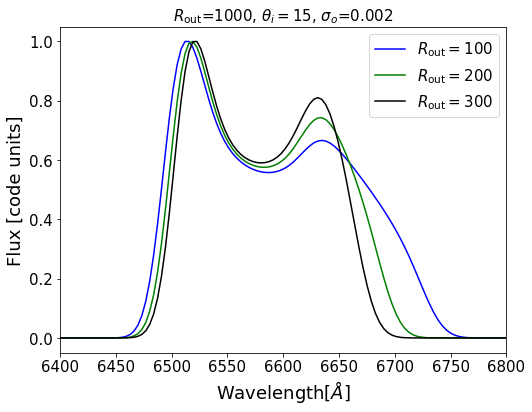

In [10]:
plt.figure(figsize=(8,6))
plt.title(r"$R_{\rm out}$=1000, $\theta_i = 15$, $\sigma_o$=0.002", fontsize=15)

plt.plot( lamda/1e-10 , ff8/max(ff8) , color = 'b', label=r"$R_{\rm out}=100$")
plt.plot( lamda/1e-10 , ff9/max(ff9) , color = 'g', label=r"$R_{\rm out}=200$")
plt.plot( lamda/1e-10 , ff10/max(ff10) , color = 'k', label=r"$R_{\rm out}=300$")
plt.xlim(6400,6800)

plt.xticks( fontsize=15 )
plt.yticks( fontsize=15 )
plt.legend(loc='best', fontsize=15)

plt.xlabel(r"Wavelength[$\AA$]", fontsize=18)
plt.ylabel(r"Flux [code units]", fontsize=18)

## Test the code for different values of emissivity powerlaw ($\epsilon \sim r^{-q}$)

In [11]:
local_broadening = 0.002
Rin  = 400.
Rout = 1000.
inclination = 15.
index1 = 3
index2 = 5

halpha.xnum = 80     # number of annuli to be used during integration in the outer disk i.e. r > 50 Rg
halpha.dphi = 0.005  # angular integration

halpha.emissivity_index = index1
ff11 = halpha.flam( lamda, Halpha, local_broadening,
                  Rin, Rout, inclination, 1.)

halpha.emissivity_index = index2
ff12 = halpha.flam( lamda, Halpha, local_broadening,
                  Rin, Rout, inclination, 1.)

Text(0, 0.5, 'Flux [code units]')

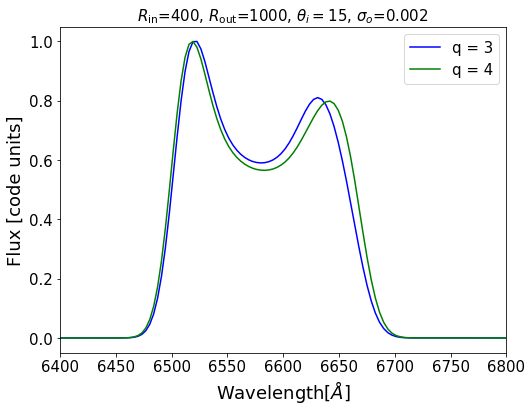

In [13]:
plt.figure(figsize=(8,6))
plt.title(r"$R_{\rm in}$=400, $R_{\rm out}$=1000, $\theta_i = 15$, $\sigma_o$=0.002", fontsize=15)

plt.plot( lamda/1e-10, ff11/max(ff11) , color = 'b', label=r"q = 3")
plt.plot( lamda/1e-10, ff12/max(ff12) , color = 'g', label=r"q = 4")
plt.xlim(6400,6800)

plt.xticks( fontsize=15 )
plt.yticks( fontsize=15 )
plt.legend(loc='best', fontsize=15)

plt.xlabel(r"Wavelength[$\AA$]", fontsize=18)
plt.ylabel(r"Flux [code units]", fontsize=18)